In [2]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor 
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
from numpy.random import seed
import math, time

In [3]:
seed(1)
import tensorflow as tf
tf.random.set_seed(1)


In [4]:
def normalize(df):
    sc = MinMaxScaler(feature_range = (0, 1))
    df=sc.fit_transform(df)
    df=pd.DataFrame(df)
    df.columns=['Open','High','Low','Ma_5','Ma_10','K','D','Rsi_5','Macd','Willr','Upperband','Middleband','Lowerband',"Price"]
    return df
def denormalize(df, norm_value):
    original_value = df['Price'].values.reshape(-1,1)
    norm_value = norm_value.reshape(-1,1)
    min_max_scaler = MinMaxScaler()
    min_max_scaler.fit_transform(original_value)
    denorm_value = min_max_scaler.inverse_transform(norm_value)
    return denorm_value

In [5]:
def load_data(stock, seq_len):
    amount_of_features = len(stock.columns)
    data = stock.values#pd.DataFrame(stock)
    sequence_length = seq_len + 1
    result = stock
    y=stock["Price"].shift(-seq_len)
    y = np.array(y)
    result = np.array(result)
    row = round(0.7 * result.shape[0])
    train = result[:int(row), :]
    x_train = train[:, :-1]
    y_train = y[:int(row)]
    x_test = result[int(row):result.shape[0]-1, :-1]
    y_test = y[int(row):len(y)-1]
    return [x_train, y_train, x_test, y_test]

In [7]:
df=pd.read_excel("input1.xls")
df=df[['Open','High','Low','Ma_5','Ma_10','K','D','Rsi_5','Macd','Willr','Upperband','Middleband','Lowerband',"Price"]]
df1=df

In [8]:
df=normalize(df)


In [9]:
df

,Open,High,Low,Ma_5,Ma_10,K,D,Rsi_5,Macd,Willr,Upperband,Middleband,Lowerband,Price
0,0.005634,0.003782,0.005739,0.004319,0.004349,0.178788,0.144904,0.410547,0.358378,0.211591,0.003482,0.004319,0.006458,0.005226
1,0.005513,0.003608,0.005724,0.004310,0.004269,0.243925,0.186705,0.418402,0.358522,0.245172,0.003465,0.004310,0.006456,0.005236
2,0.005524,0.003587,0.004688,0.004110,0.004129,0.146947,0.181691,0.151830,0.358113,0.044242,0.003911,0.004110,0.005518,0.004257
3,0.004491,0.002687,0.003623,0.003764,0.003913,0.105085,0.156383,0.086801,0.357389,0.112809,0.004256,0.003764,0.004385,0.003477
4,0.003668,0.002284,0.003880,0.003443,0.003695,0.105803,0.108956,0.247825,0.357074,0.251428,0.003931,0.003443,0.004068,0.003829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2186,0.902248,0.925146,0.894941,0.895897,0.935390,0.936243,0.913986,0.856735,0.812471,0.933329,0.916738,0.895897,0.872182,0.915889
2187,0.966402,0.978482,0.944289,0.913954,0.949016,0.857699,0.909031,0.813547,0.838726,0.668626,0.944989,0.913954,0.878557,0.909162
2188,0.959011,0.946661,0.954801,0.942096,0.964602,0.793868,0.874668,0.852464,0.869710,0.794371,0.967084,0.942096,0.913582,0.936911
2189,0.988636,0.944776,0.945928,0.969050,0.978609,0.766253,0.816298,0.866541,0.894529,0.844606,0.971423,0.969050,0.966372,0.947996


In [10]:
window = 1
X_train, y_train, X_test, y_test = load_data(df, window)

In [11]:
y_test

array([0.13383245, 0.13296497, 0.13326807, 0.13420174, 0.13504484,
       0.13298936, 0.13327504, 0.13369658, 0.13342484, 0.13141466,
       0.13161672, 0.13506226, 0.13450136, 0.13716999, 0.13750444,
       0.13717348, 0.13866457, 0.16354629, 0.16735763, 0.16504783,
       0.16880343, 0.17005762, 0.17449606, 0.1769905 , 0.17396651,
       0.1791714 , 0.16923543, 0.17033633, 0.17025272, 0.17314432,
       0.16957337, 0.17475038, 0.17570496, 0.17766986, 0.17684418,
       0.17855824, 0.17693128, 0.18052662, 0.1862715 , 0.182927  ,
       0.17573283, 0.17884043, 0.17771166, 0.17897979, 0.17663515,
       0.1796243 , 0.18183307, 0.18565138, 0.19516231, 0.19739547,
       0.19544451, 0.19440632, 0.19804346, 0.20294874, 0.20995826,
       0.21673437, 0.24475505, 0.23759572, 0.26620517, 0.27277573,
       0.27869829, 0.26849755, 0.25064974, 0.24727388, 0.27844049,
       0.27175496, 0.27053561, 0.26027216, 0.26781123, 0.27192218,
       0.27391844, 0.29491914, 0.29944467, 0.29791874, 0.29553

In [12]:
X_test

array([[0.13649962, 0.12942395, 0.13658642, ..., 0.12858734, 0.1365133 ,
        0.14660389],
       [0.13816815, 0.13341815, 0.13838308, ..., 0.13161911, 0.13752126,
        0.14529571],
       [0.14118179, 0.13199985, 0.13958085, ..., 0.13258135, 0.13822852,
        0.14571049],
       ...,
       [0.96640156, 0.97848206, 0.94428891, ..., 0.94498886, 0.91395386,
        0.87855663],
       [0.95901079, 0.94666055, 0.95480064, ..., 0.96708419, 0.94209577,
        0.91358151],
       [0.98863636, 0.94477643, 0.94592758, ..., 0.97142328, 0.96904976,
        0.96637152]])

In [13]:
#pca = PCA(n_components=13)
#pca.fit(X_train)

In [14]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (1534, 13)
y_train (1534,)
X_test (656, 13)
y_test (656,)


In [15]:
y_train

array([0.00523624, 0.00425728, 0.00347689, ..., 0.12890976, 0.12939402,
       0.13097221])

In [16]:
y_train.shape

(1534,)

In [17]:
#kernel=rbf
from sklearn.svm import SVR
s = SVR(kernel = 'rbf', C = 1e3, gamma = 0.0001)
s.fit(X_train,y_train)
s_c = s.score(X_test,y_test)
print("score: ",s_c)

score:  0.9242693044086486


In [18]:
trainPredict = s.predict(X_train)
testPredict = s.predict(X_test)
x = denormalize(df1, y_train)
train_stock_price = denormalize(df1, trainPredict)
y = denormalize(df1, y_test)
predicted_stock_price = denormalize(df1, testPredict)

In [19]:
print("y_real",y.shape)
print("y_predict",y.shape)

y_real (656, 1)
y_predict (656, 1)


In [20]:
predicted_stock_price

array([[ 5782.2436566 ],
       [ 5880.15715174],
       [ 5858.79429327],
       [ 5882.96699744],
       [ 5946.88451246],
       [ 6021.35023749],
       [ 5866.74242348],
       [ 5861.54348349],
       [ 5873.97267812],
       [ 5820.60650543],
       [ 5603.67942462],
       [ 5581.34813141],
       [ 5878.15633214],
       [ 5884.3869738 ],
       [ 6012.30546532],
       [ 6037.39131506],
       [ 6035.11536371],
       [ 6096.3055263 ],
       [ 6325.25018543],
       [ 6529.5136274 ],
       [ 6553.84657855],
       [ 6668.72082093],
       [ 6798.75649803],
       [ 6909.76443377],
       [ 7000.90608179],
       [ 6988.86449039],
       [ 7068.49748252],
       [ 6885.15291646],
       [ 6705.79602828],
       [ 6663.93206064],
       [ 6705.58700574],
       [ 6581.4322804 ],
       [ 6727.38673522],
       [ 6798.40801334],
       [ 6897.17507274],
       [ 6894.18100338],
       [ 7013.6924728 ],
       [ 6967.31879619],
       [ 7054.87139374],
       [ 7118.26444355],


In [21]:
y

array([[ 4006.4],
       [ 3981.5],
       [ 3990.2],
       [ 4017. ],
       [ 4041.2],
       [ 3982.2],
       [ 3990.4],
       [ 4002.5],
       [ 3994.7],
       [ 3937. ],
       [ 3942.8],
       [ 4041.7],
       [ 4025.6],
       [ 4102.2],
       [ 4111.8],
       [ 4102.3],
       [ 4145.1],
       [ 4859.3],
       [ 4968.7],
       [ 4902.4],
       [ 5010.2],
       [ 5046.2],
       [ 5173.6],
       [ 5245.2],
       [ 5158.4],
       [ 5307.8],
       [ 5022.6],
       [ 5054.2],
       [ 5051.8],
       [ 5134.8],
       [ 5032.3],
       [ 5180.9],
       [ 5208.3],
       [ 5264.7],
       [ 5241. ],
       [ 5290.2],
       [ 5243.5],
       [ 5346.7],
       [ 5511.6],
       [ 5415.6],
       [ 5209.1],
       [ 5298.3],
       [ 5265.9],
       [ 5302.3],
       [ 5235. ],
       [ 5320.8],
       [ 5384.2],
       [ 5493.8],
       [ 5766.8],
       [ 5830.9],
       [ 5774.9],
       [ 5745.1],
       [ 5849.5],
       [ 5990.3],
       [ 6191.5],
       [ 6

In [22]:
import matplotlib.pyplot as plt 

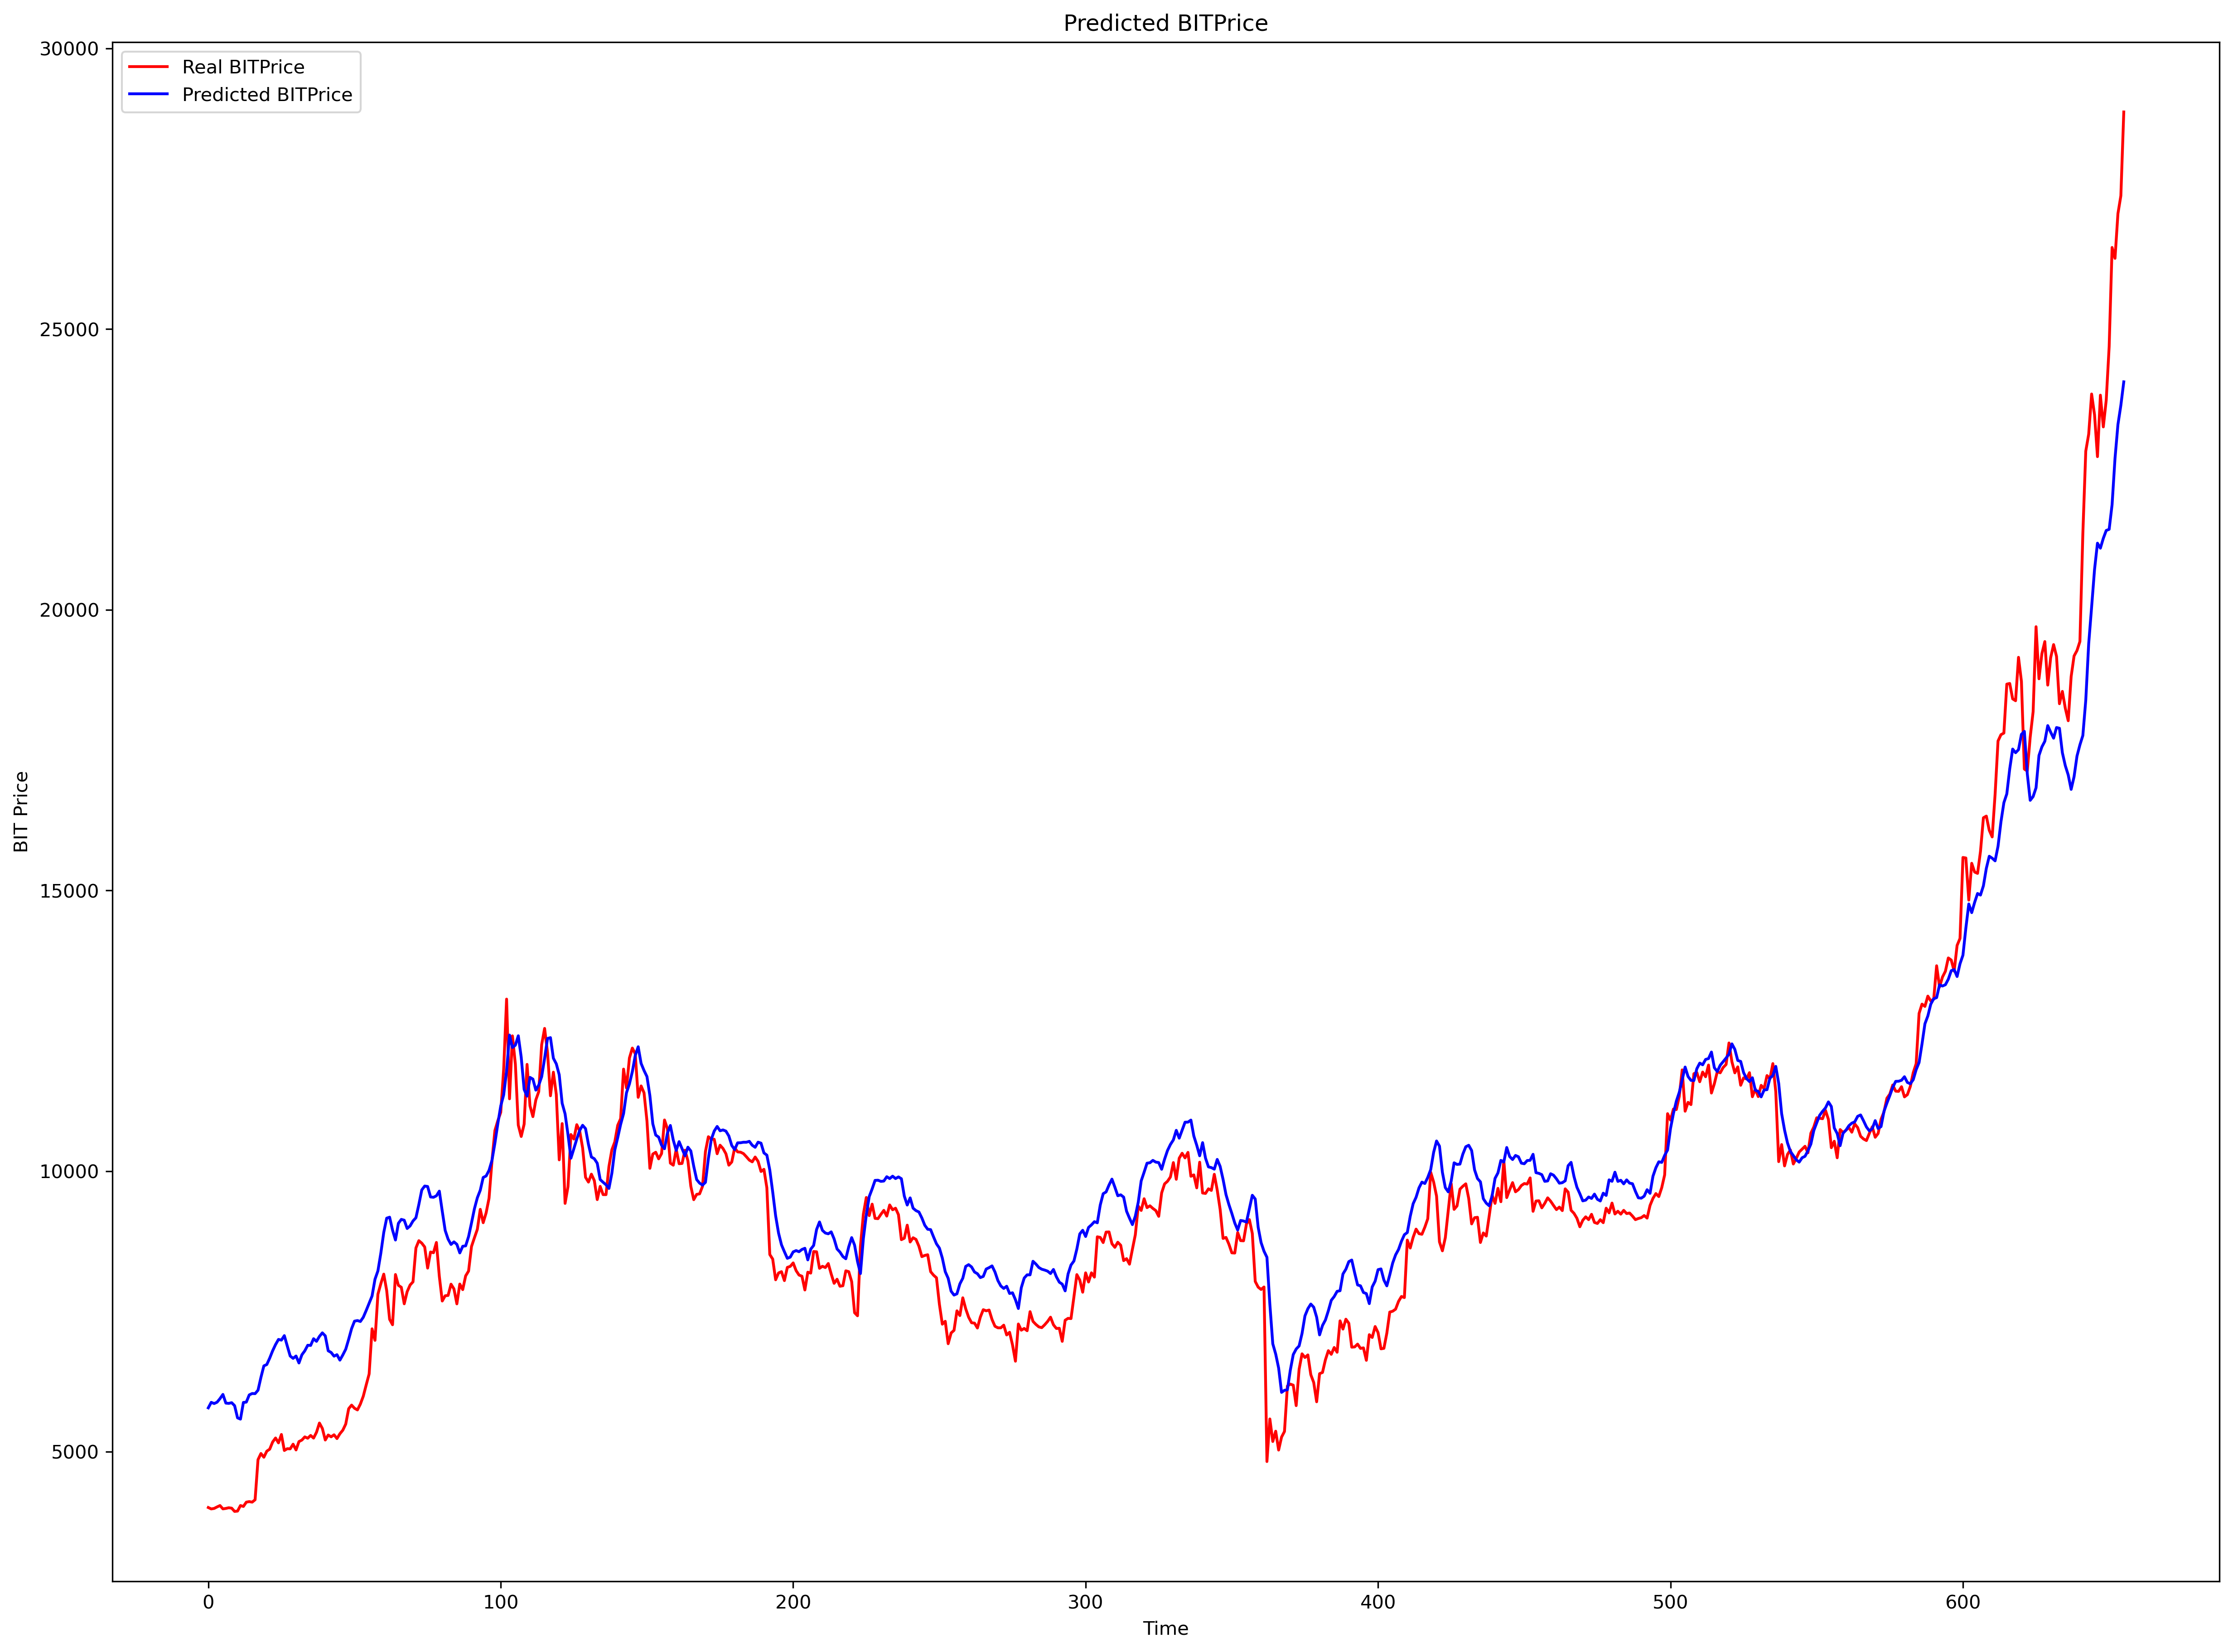

In [23]:
plt.figure(figsize=(20,15),dpi= 300)
plt.plot(y, color = 'red', label = 'Real BITPrice') 
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted BITPrice') 
plt.title('Predicted BITPrice')
plt.xlabel('Time')
plt.ylabel('BIT Price')
plt.legend()
plt.show()

In [24]:
mse=np.sum((y-predicted_stock_price)**2)/len(predicted_stock_price)
print(mse)
rmse=mse**0.5
print(rmse)
mae = np.sum(np.absolute(y-predicted_stock_price)) / len(y)
print(mae)

mape=np.mean(np.abs((y-predicted_stock_price) / y)) * 100
print(mape)

1039493.9394297668
1019.5557559200805
774.0380182301077
9.422495995241317


In [25]:
from numba import cuda
cuda.select_device(0)
cuda.close()